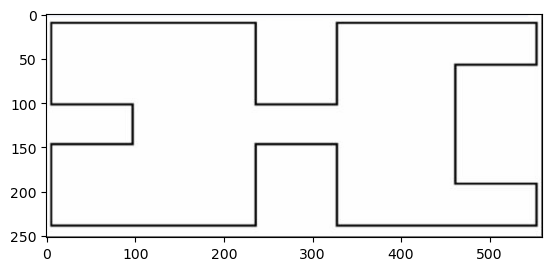

(252, 560, 3)


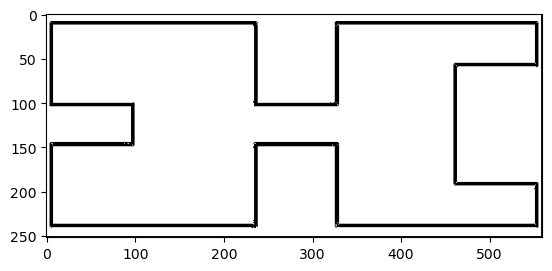

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=plt.imread('Pictures/T2.jpg')
plt.imshow(img)
plt.show()
    
img=np.array(img)
print(img.shape)
H,W=img.shape[0],img.shape[1]
img_gray=np.zeros((H,W),dtype=np.uint8)
img_gray=(img[:,:,0]+img[:,:,1]+img[:,:,2])//3
for h in range(H):
    for w in range(W):
        if img_gray[h,w]<66:
            # print(h,w,img_gray[h,w])
            img_gray[h,w]=0
        else:
            img_gray[h,w]=255
plt.imshow(img_gray,'gray')
plt.show()


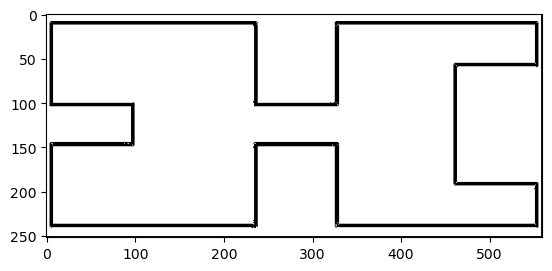

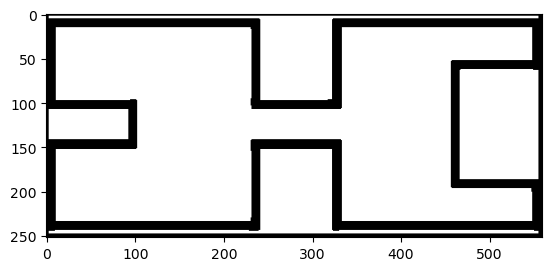

In [33]:
def dalition(img,kernel):
    H,W=img.shape
    k=kernel.shape[0]
    pad=k//2
    img_pad=np.pad(img,((pad,pad),(pad,pad)),'constant',constant_values=0)
    img_dalition=np.zeros((H,W),dtype=np.uint8)
    for h in range(H):
        for w in range(W):
            img_dalition[h,w]=np.min(img_pad[h:h+k,w:w+k]*kernel)
    return img_dalition

def erosion(img,kernel):
    H,W=img.shape
    k=kernel.shape[0]
    pad=k//2
    img_pad=np.pad(img,((pad,pad),(pad,pad)),'constant',constant_values=0)
    img_erosion=np.zeros((H,W),dtype=np.uint8)
    for h in range(H):
        for w in range(W):
            img_erosion[h,w]=np.max(img_pad[h:h+k,w:w+k]*kernel)
    return img_erosion

kernel=np.ones((7,7),dtype=np.uint8)
img_dalition=dalition(img_gray,kernel)
img_erosion=erosion(img_gray,kernel)
plt.imshow(img_gray,'gray') 
plt.show()
plt.imshow(img_dalition,'gray')
plt.show()
# plt.imshow(img_erosion,'gray')  
# plt.show()
            